Anita Soroush, 98222085, Computational Neuroscience, Project2

In [ ]:
import matplotlib.pyplot as plt    
import numpy as np                 
import time      
import math       
import random

In [ ]:
class LIF():
    def __init__(self, I, T=100, dt=0.1, neuron_type=1,
    V_th=-45, V_rest=-70, V_init=-80, V_reset=-65, V_spike=5, g_L=10, tau_m=8, 
    delta_T=1, theta_r_h=-55, a=0.01, b=0.5, tau_w=1):

        ### typical neuron parameters###
        self.neuron_type = neuron_type
        self.v_t = []
        self.fire_count = 0
        self.v = V_init
        self.V_init= V_init # initial potential [mV]
        self.V_th = V_th # spike threshold [mV]
        self.V_rest = V_rest #rest potential [mV]
        self.V_reset = V_reset #reset potential [mV]
        self.V_spike = V_spike
        self.g_L = g_L #leak conductance [nS]
        self.tau_m = tau_m # membrane time constant [ms]
        self.tau_w = tau_w

        ### simulation parameters ###
        self.I = I
        self.T = T # Total duration of simulation [ms]
        self.dt = dt  # Simulation time step [ms]


    def start(self):
        t = 0
        while t <= self.T:

            dv = (
                -(self.v - self.V_rest) 
                + self.I(t) * self.g_L
                )* (self.dt/self.tau_m)



            self.v += dv * self.dt
            is_spike = False
            if self.v >= self.V_th:
                self.v_t.append(self.v + self.V_spike)
                self.fire_count += 1
                self.v = self.V_reset
                is_spike = True

            else:
                self.v_t.append(self.v)

            t += self.dt

            yield {'u': self.v, 'is_spike': is_spike}


    def v_t_plot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.v_t)))), self.v_t)
        plt.show()
        self.a

    def __repr__(self):
        return "This is object of class LIF"

In [ ]:
class Population:

  def __init__(self, neurons, connections, excw=10, inhw=-10, exc_delay=1, inh_delay=1, iteration_count=1000):
    self.neurons = neurons
    self.neroun_action = []
    for i in neurons:
      self.neroun_action.append(i.start())

    self.connections = connections
    self.excw = excw
    self.inhw = inhw
    self.iteration_count = iteration_count
    self.spikes = []
    self.exc_spikes_time = []
    self.exc_spikes = []
    self.inh_spikes_time = []
    self.inh_spikes = []
    self.exc_delay = exc_delay
    self.inh_delay = inh_delay
    self.spikes_effect = []

  def start(self):
    self.spikes_effect = [[0] * len(self.neurons) for _ in range(self.iteration_count)]
    for t in range(self.iteration_count):
      flag = False
      
      for i in range(len(self.neroun_action)):

        action_info = next(self.neroun_action[i])
        if action_info['is_spike']:
          
          for j in self.connections[i]:
            if self.neurons[i].neuron_type == 1:
              self.exc_spikes.append(i + 1)
              self.exc_spikes_time.append(t)
              if t+self.exc_delay < self.iteration_count:
                self.spikes_effect[t + self.exc_delay][j] += self.excw

            if self.neurons[i].neuron_type == -1:
              self.inh_spikes.append(i + 1)
              self.inh_spikes_time.append(t)
              if t+self.inh_delay < self.iteration_count:
                self.spikes_effect[t+self.inh_delay][j] += self.inhw
      for i in range(len(self.neurons)):
        self.neurons[i].v += self.spikes_effect[t][i]
      

  def neurons_u_plot(self, neurons_count=5):
    legend = []
    for i in range(min(neurons_count, len(self.neurons))):
      plt.plot(list(map(lambda j: j * self.neurons[i].dt, range(len(self.neurons[i].v_t)))), self.neurons[i].v_t)
      legend.append('neuron ' + str(i+1))
    plt.legend(legend)

  def raster_plot(self):
    plt.scatter(self.exc_spikes_time, self.exc_spikes, color='blue', s=10)
    plt.scatter(self.inh_spikes_time, self.inh_spikes, color='red', s=10)
    plt.legend(['Excitatory', 'Inhibitory'])

# **2 neurons**

### **1) both of them excitatory:**

Neuron1:

Text(0, 0.5, 'Input Current(mV)')

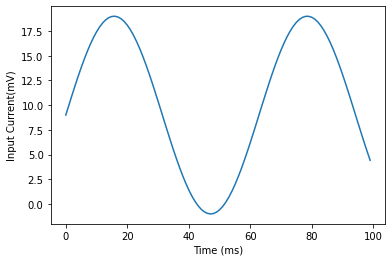

In [ ]:
I1 = lambda x: 10* (math.sin(x/10) + 0.9)
neuron1 = LIF(I=I1)
plt.plot(range(100), list(map(I1, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

Neuron2:

Text(0, 0.5, 'Input Current(mV)')

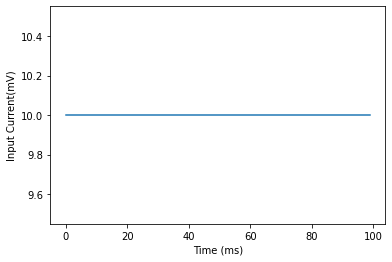

In [ ]:
I2 = lambda x: 10
neuron2 = LIF(I=I2)
plt.plot(range(100), list(map(I2, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

In [ ]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = Population(neurons, connections)
neurons_group.start()

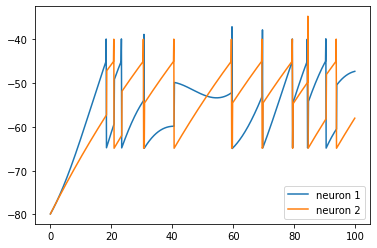

In [ ]:
neurons_group.neurons_u_plot()

### **2) both of them inhibitory:**

Neuron1:

Text(0, 0.5, 'Input Current(mV)')

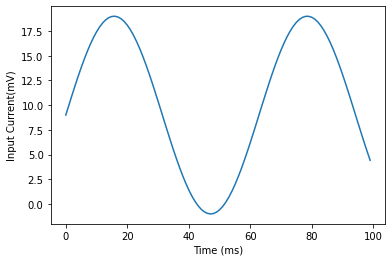

In [ ]:
I1 = lambda x: 10* (math.sin(x/10) + 0.9)
neuron1 = LIF(I=I1, neuron_type = -1, tau_m=6)
plt.plot(range(100), list(map(I1, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

Neuron2:

Text(0, 0.5, 'Input Current(mV)')

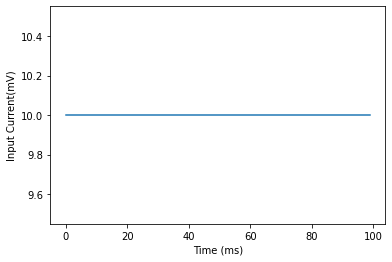

In [ ]:
I2 = lambda x: 10
neuron2 = LIF(I=I2, neuron_type = -1, tau_m=6)
plt.plot(range(100), list(map(I2, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

In [ ]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = Population(neurons, connections)
neurons_group.start()

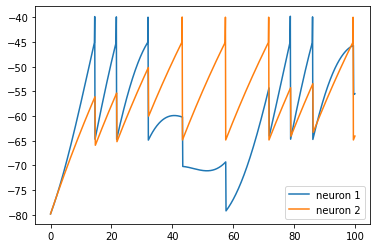

In [ ]:
neurons_group.neurons_u_plot()

### **1) one of them excitatory (sine wave) and the other one inhibitory (constatnt current):**

Neuron1:

Text(0, 0.5, 'Input Current(mV)')

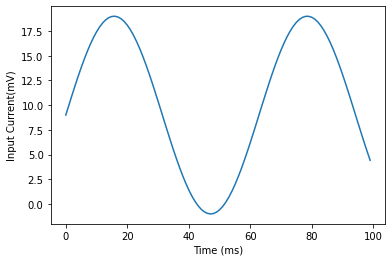

In [ ]:
I1 = lambda x: 10* (math.sin(x/10) + 0.9)
neuron1 = LIF(I=I1)
plt.plot(range(100), list(map(I1, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

Neuron2:

Text(0, 0.5, 'Input Current(mV)')

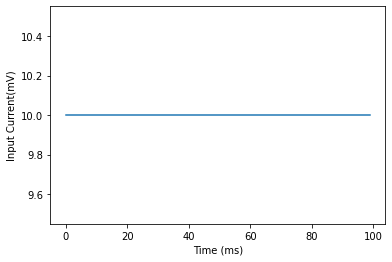

In [ ]:
I2 = lambda x: 10
neuron2 = LIF(I=I2, neuron_type = -1, tau_m=6)
plt.plot(range(100), list(map(I2, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(mV)')

In [ ]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = Population(neurons, connections)
neurons_group.start()

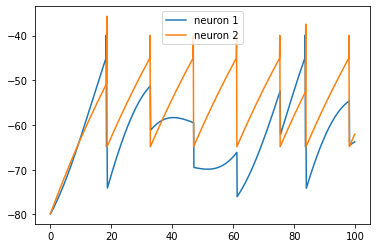

In [ ]:
neurons_group.neurons_u_plot()

# **10 neurons:**
A fully connected population made up of 2 inhibitory neurons and 8 excitatory neurons:


In [ ]:
I_exc = lambda x: 10* (math.sin(x/10) + 0.9)
I_inh = lambda x:0

import math

def neuron_group_creator(neurons_count, exitatory_ratio, connection_ratio, exc_I = I_exc, inh_I = I_inh):

    neurons = []
    exc_num = math.floor(exitatory_ratio*neurons_count)
    inh_num = neurons_count - exc_num
    connection_num = connection_ratio * (neurons_count-1)
    connections = []

    for iterator in list(range(neurons_count)):
        if iterator < inh_num:
            neurons.append(LIF(I=inh_I, neuron_type= -1, tau_m=6))
        else :
            neurons.append(LIF(I=exc_I))
        connections.append(random.sample(list(range(0, iterator)) + list(range(iterator+1, neurons_count)), connection_num))
    return neurons, connections   

In [ ]:
I = lambda x: 10* (math.sin(x/10) + 0.9)
neurons, connections = neuron_group_creator(10, 0.8, 1, exc_I = I, inh_I = I)
neurons_group = Population(neurons, connections)
neurons_group.start()

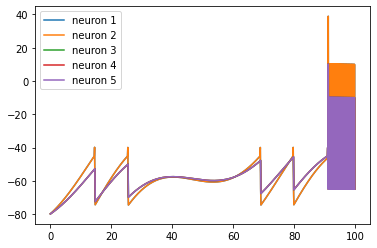

In [ ]:
neurons_group.neurons_u_plot()

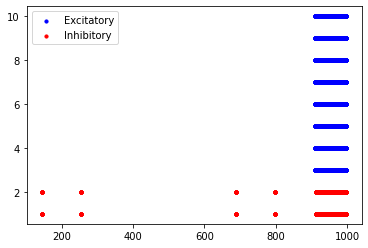

In [ ]:
neurons_group.raster_plot()

In [ ]:
class Population:

  def __init__(self, neurons, connections, spikes_threshold = 2, connected_neuron_groups_effect = 5,
               excw=10, inhw=-10, exc_delay=1, inh_delay=1, iteration_count=1000):
    self.neurons = neurons
    self.majority_type = 0
    for neuron in neurons:
        self.majority_type += neuron.neuron_type
    self.neroun_action = []
    for i in neurons:
      self.neroun_action.append(i.start())

    self.connections = connections
    self.excw = excw
    self.inhw = inhw
    self.iteration_count = iteration_count
    self.spikes = []
    self.exc_spikes_time = []
    self.exc_spikes = []
    self.inh_spikes_time = []
    self.inh_spikes = []
    self.exc_delay = exc_delay
    self.inh_delay = inh_delay
    self.spikes_effect = []
    self.connected_neuron_groups = []
    self.spikes_threshold = spikes_threshold
    self.connected_neuron_groups_effect = connected_neuron_groups_effect

    self.a_t = []
    self.time_range = []

  def start(self):
    self.spikes_effect = [[0] * len(self.neurons) for _ in range(self.iteration_count)]
    for t in range(self.iteration_count):
      flag = False
      spikes_count = 0
      for i in range(len(self.neroun_action)):
        action_info = next(self.neroun_action[i])
        if action_info['is_spike']:
          spikes_count += 1
          for j in self.connections[i]:
            if self.neurons[i].neuron_type == 1:
                self.exc_spikes.append(i + 1)
                self.exc_spikes_time.append(t)
                if t+self.exc_delay < self.iteration_count:
                    self.spikes_effect[t + self.exc_delay][j] += self.excw

            if self.neurons[i].neuron_type == -1:
              self.inh_spikes.append(i + 1)
              self.inh_spikes_time.append(t)
              if t+self.inh_delay < self.iteration_count:
                self.spikes_effect[t+self.inh_delay][j] += self.inhw
        if spikes_count >= self.spikes_threshold:
            if self.majority_type > 0:
              for j in self.connected_neuron_groups:
                for neuron in j.neurons:
                    neuron.v += self.connected_neuron_groups_effect
            else:
              for j in self.connected_neuron_groups:
                for neuron in j.neurons:
                    neuron.v -= self.connected_neuron_groups_effect
      self.a_t.append(spikes_count/len(self.neurons))
      self.time_range.append(t)
      for i in range(len(self.neurons)):
        self.neurons[i].v += self.spikes_effect[t][i]
      yield 
      
  def connect(self, neuron_group):
    self.connected_neuron_groups.append(neuron_group)

  def neurons_u_plot(self, neurons_count=5):
    legend = []
    for i in range(min(neurons_count, len(self.neurons))):
      plt.plot(list(map(lambda j: j * self.neurons[i].dt, range(len(self.neurons[i].v_t)))), self.neurons[i].v_t)
      legend.append('neuron ' + str(i+1))
    plt.legend(legend)

  def raster_plot(self):
    plt.scatter(self.exc_spikes_time, self.exc_spikes, color='blue', s=10)
    plt.scatter(self.inh_spikes_time, self.inh_spikes, color='red', s=10)
    plt.legend(['Excitatory', 'Inhibitory'])

  def population_activity_plot(self):
       plt.plot(self.time_range, self.a_t)


In [72]:
import random
I_E1 = lambda x: random.random()*10
I_E2 = lambda x: random.random()*10
I_inh = lambda x: 0

In [73]:
E_neurons_1, E_neurons_1_connections = neuron_group_creator(10, 1, 1, exc_I = I_E1)
E1 = Population(E_neurons_1, E_neurons_1_connections)

E_neurons_2, E_neurons_2_connections = neuron_group_creator(10, 1, 1, exc_I = I_E2)
E2 = Population(E_neurons_2, E_neurons_2_connections)

inh_neurons, inh_neurons_connections = neuron_group_creator(10, 0, 1, inh_I = I_inh)
inh = Population(inh_neurons, inh_neurons_connections)

In [74]:
E1.connect(inh)
E2.connect(inh)
inh.connect(E1)
inh.connect(E2)

In [75]:
E1_controller = E1.start()
E2_controller = E2.start()
inh_controller = inh.start()

for i in range(E1.iteration_count):
  next(E1_controller)
  next(E2_controller)
  next(inh_controller)

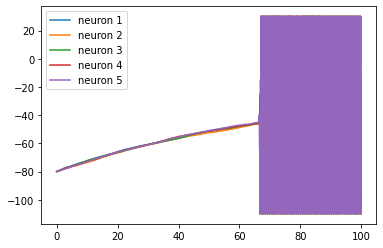

In [76]:
E1.neurons_u_plot()

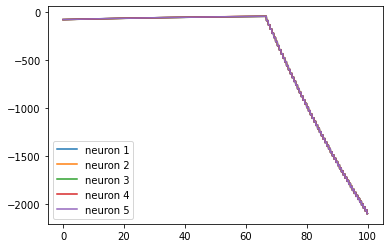

In [77]:
E2.neurons_u_plot()

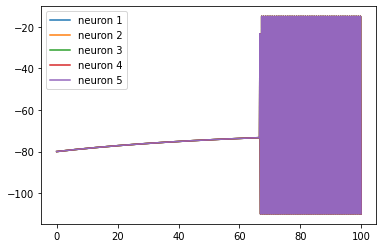

In [78]:
inh.neurons_u_plot()

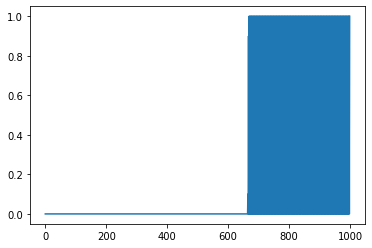

In [79]:
E1.population_activity_plot()

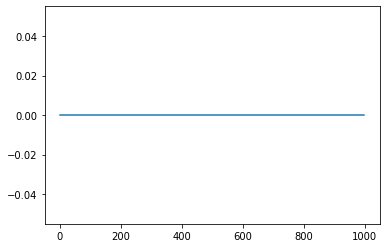

In [80]:
E2.population_activity_plot()

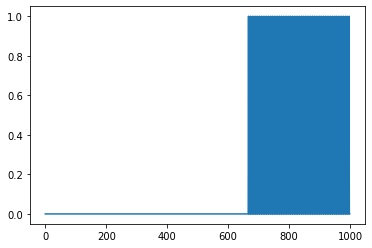

In [81]:
inh.population_activity_plot()

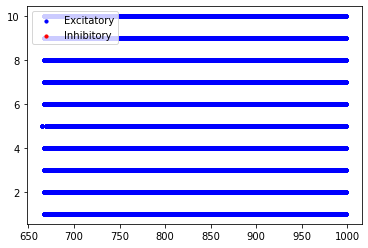

In [82]:
E1.raster_plot()

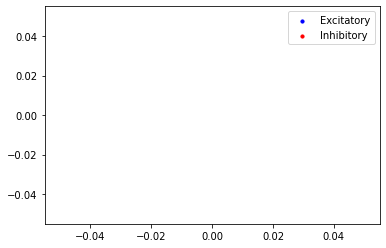

In [83]:
E2.raster_plot()

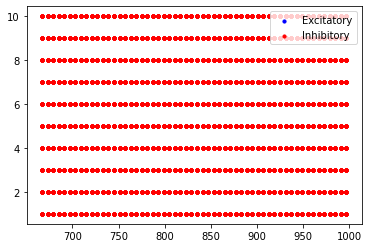

In [84]:
inh.raster_plot()